In [0]:
import os
from tqdm import tqdm
import cv2
import numpy as np
from random import shuffle 

foldername =  [name for name in os.listdir(".") if os.path.isdir(name)]
IMG_SIZE = 100
def create_label(image_name):
    """ Create an one-hot encoded vector from image name """
    word_label = image_name.split('_')[4]
    if word_label == '0':
        return np.array([1,0])
    elif word_label == '1':
        return np.array([0,1])
def create_train_data():
    training_data = []
    for fdname in foldername:
        TRAIN_DIR =  fdname
        for img in tqdm(os.listdir(TRAIN_DIR)):
            path = os.path.join(TRAIN_DIR, img)
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img_data = cv2.resize(img_data, (IMG_SIZE,IMG_SIZE ))
            training_data.append([np.array(img_data), create_label(img)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data
#train_data = create_train_data()
train_data = np.load('train_data.npy',allow_pickle=True)
train = train_data
X_train = np.array([i[0] for i in train]).reshape(-1,100 , 100, 1)
y_train = [i[1] for i in train]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(68767, 100, 100, 1)
(68767, 2)
(7641, 100, 100, 1)
(7641, 2)


In [7]:
print(X_train.shape)
y_train = np.array(y_train)
print(y_train.shape)
print(X_test.shape)
y_test = np.array(y_test)
print(y_test.shape)

(68767, 100, 100, 1)
(68767, 2)
(7641, 100, 100, 1)
(7641, 2)


In [8]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import keras

Using TensorFlow backend.


In [0]:
#data augmentation : sinh ra thêm data
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [10]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

 













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
EarlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            min_delta=1e-5, patience=10, verbose=1, mode='auto')
Adaptive=keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, 
                                           patience=5, verbose=1, mode='auto', 
                                           min_delta=0.0005, cooldown=0, min_lr=0.0004)
#model = ResNet50(input_shape = (32, 32, 3), classes = 10)
#opt = SGD(lr=0.01, momentum=0.9, decay=0.0001, nesterov=False)
#opt = keras.optimizers.Adam(lr=0.0005)
model.compile(optimizer = 'adam', loss='binary_crossentropy', 
              metrics=['accuracy'])
H= model.fit(X_train, y_train,
              batch_size=128,
              epochs=70,
              callbacks=[Adaptive,EarlyStopping],
              validation_split=0.2,
              shuffle=True)
score = model.evaluate(X_test, y_test, verbose=0)
print(score)
model.save('pretrain3.hdf5')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55013 samples, validate on 13754 samples
Epoch 1/70
55013/55013 [==============================] - 146s 3ms/step - loss: 0.1985 - acc: 0.9425 - val_loss: 0.2107 - val_acc: 0.9250
Epoch 2/70
55013/55013 [==============================] - 139s 3ms/step - loss: 0.0918 - acc: 0.9787 - val_loss: 0.0954 - val_acc: 0.9763
Epoch 3/70
55013/55013 [==============================] - 139s 3ms/step - loss: 0.0787 - acc: 0.9823 - val_loss: 0.0888 - val_acc: 0.9774
Epoch 4/70
55013/55013 [==============================] - 139s 3ms/step - loss: 0.0706 - acc: 0.9845 - val_loss: 0.0752 - val_acc: 0.9820
Epoch 5/70
55013/55013 [==============================] - 139s 3ms/step - loss: 0.0712 - acc: 0.9836 - val_loss: 0.5495 - val_acc: 0.6947
Epoch 6/70
55013/55013 [==============================] - 138s 3ms/step - loss: 0.0664 - acc: 0.9856 - val_loss: 0.1612 - val_acc: 0.9488
Epoch 7/70
55013/55013 [

In [0]:
model.save('pretrain1.hdf5')

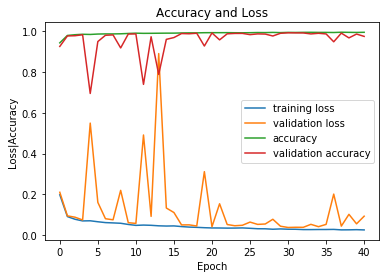

In [13]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
import matplotlib.pyplot as plt
fig = plt.figure()
numOfEpoch = 41
plt.plot(np.arange(0, numOfEpoch), model.history.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), model.history.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), model.history.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), model.history.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [0]:
#testing
scores = model.evaluate(X_test, y_test, verbose=1)
print("Acccuracy: ", 100*scores[1])
print("Loss: ", scores[0])

8490/8490 [==============================] - 9s 1ms/step
Acccuracy:  98.42167255594816
Loss:  0.05754473526535382
